Source: https://www.kaggle.com/benwieland/nba-draft-data
        
        
blank column: An index of each unique row number.

Rk and Pk: Corresponds to the pick with which a player was selected in the NBA draft.

Tm: The NBA team that drafted a player.

Player: The name of the player.

College: The college an NBA draft pick attended. For international prospects, players who were drafted out of the G-League, and players who were drafted directly out of high school, this column is blank.

Yrs: Years spent in the NBA. NA for players who did not play a single season.

G: Games played in the NBA. NA for players who did not play a single game.

TOTMP: Total minutes played in the NBA. NA for players who did not play a single minute.

TOTPTS: Total points scored in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record a point.

TOTTRB: Total rebounds grabbed in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record a rebound.

TOTAST: Total assists recorded in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record an assist.

FG%: Field goal percentage in the NBA. NA for players who did not play in the NBA

3P%: Three point percentage in the NBA. NA for players who did not play in the NBA

FT%: Free throw percentage in the NBA. NA for players who did not play in the NBA

WS: Win shares in the NBA, using Basketball-Reference's Win Shares. NA for players who did not play in the NBA

WS/48: Win shares in the NBA per 48 minutes, using Basketball-Reference's Win Shares. NA for players who did not play in the NBA

BPM: Box plus-minus in the NBA, using Basketball-Reference. NA for players who did not play in the NBA

VORP Value over replacement player, using Basketball-Reference. NA for players who did not play in the NBA
DraftYr and DraftYear: Duplicate variables for the year a player was drafted.

playerurl: A player's college Sports-Reference statistics page link. NA for players from high school/G-League/international.

MPG, PPG, RPG, APG: Per game statistics computed from totals columns. NA for players who did not play in the NBA.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [82]:
data=pd.read_csv('draft-data-20-years.csv',index_col=0)

In [83]:
data.head(2)

,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,TOTTRB,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,7232.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,5269.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990


In [84]:
data.tail(2)

,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,TOTTRB,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
1867,59,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,https://www.sports-reference.com/cbb/players/r...,2021
1868,60,60,IND,Georgios Kalaitzakis,NaN,1.0,9.0,48.0,16.0,8.0,...,-0.005,-8.0,-0.1,2021,5.3,1.8,0.9,0.0,NaN,2021


In [89]:
data.rename(columns={'Yrs': 'Years spent in the NBA',
                     'Tm':'Team',
                     'TOTMP':'Total Minutes Played',
                     'TOTPTS':'Total Points Scored',
                     'TOTTRB':'Total rebounds grabbed',
                     'TOTAST':'Total assists recorded',
                     'FG%':' Field goal percentage',
                     '3P%': 'Three point percentage',
                     'FT%': 'Free throw percentage',
                     'WS': 'Win shares',
                     'WS/48': 'Win shares in the NBA per 48 minutes',
                     'BPM': 'Box plus-minus',
                     'VORP': 'Value over replacement player',
                     },inplace=True)

In [85]:
data.columns

Index(['Rk', 'Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'TOTMP', 'TOTPTS',
       'TOTTRB', 'TOTAST', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'BPM', 'VORP',
       'DraftYr', 'MPG', 'PPG', 'RPG', 'APG', 'playerurl', 'DraftYear'],
      dtype='object')

In [86]:
data.shape

(1868, 25)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 1 to 60
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1868 non-null   int64  
 1   Pk                                    1868 non-null   int64  
 2   Tm                                    1868 non-null   object 
 3   Player                                1868 non-null   object 
 4   College                               1868 non-null   object 
 5   Yrs                                   1868 non-null   float64
 6   G                                     1868 non-null   float64
 7   Total Minutes Played                  1868 non-null   float64
 8   Total Points Scored                   1868 non-null   float64
 9   Total rebounds grabbed                1868 non-null   float64
 10  Total assists recorded                1868 non-null   float64
 11   Field goal percent

In [69]:
data.describe()

,Unnamed: 0,Pk,Yrs,G,Total Minutes Played,Total Points Scored,Total rebounds grabbed,Total assists recorded,Field goal percentage,Three point percentage,...,Win shares,Win shares in the NBA per 48 minutes,Box plus-minus,Value over replacement player,DraftYr,MPG,PPG,RPG,APG,DraftYear
count,1868.00000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,...,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,934.50000,29.758030,5.471627,297.192719,7159.213062,3047.586188,1281.715203,654.505353,0.376804,0.219257,...,15.252302,0.052977,-2.023662,3.747752,2005.789079,15.655139,6.264186,2.764936,1.328747,2005.789079
std,539.38947,16.945052,4.822145,322.432189,9516.144614,4616.913748,1923.031618,1206.926893,0.168444,0.158107,...,26.628617,0.092010,3.959389,10.723647,9.170436,10.173641,5.236463,2.227470,1.466481,9.170436
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.900000,-1.264000,-52.000000,-8.500000,1990.000000,0.000000,0.000000,0.000000,0.000000,1990.000000
25%,467.75000,15.000000,2.000000,30.000000,246.250000,81.750000,38.000000,13.000000,0.371000,0.000000,...,0.000000,0.000750,-3.600000,-0.300000,1998.000000,7.600000,2.300000,1.100000,0.300000,1998.000000
50%,934.50000,30.000000,4.000000,159.000000,2600.000000,894.500000,410.500000,164.000000,0.425000,0.286000,...,2.900000,0.058000,-1.600000,0.000000,2006.000000,15.600000,5.200000,2.400000,0.800000,2006.000000
75%,1401.25000,44.000000,9.000000,506.000000,11348.250000,4251.750000,1817.750000,736.250000,0.464250,0.347000,...,20.200000,0.097000,0.000000,3.000000,2014.000000,23.500000,9.100000,3.900000,1.800000,2014.000000
max,1868.00000,60.000000,22.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.000000,1.000000,...,248.300000,1.442000,51.100000,141.400000,2021.000000,41.100000,27.100000,13.400000,9.500000,2021.000000


In [36]:
data.isnull().sum()

Unnamed: 0      0
Pk              0
Tm              0
Player          0
College       335
Yrs           247
G             247
TOTMP         247
TOTPTS        247
TOTTRB        247
TOTAST        247
FG%           252
3P%           368
FT%           284
WS            247
WS/48         248
BPM           248
VORP          247
DraftYr         0
MPG           247
PPG           247
RPG           247
APG           247
playerurl     335
DraftYear       0
dtype: int64

In [37]:
data.fillna(0,inplace=True)

In [38]:
data.isnull().sum()

Unnamed: 0    0
Pk            0
Tm            0
Player        0
College       0
Yrs           0
G             0
TOTMP         0
TOTPTS        0
TOTTRB        0
TOTAST        0
FG%           0
3P%           0
FT%           0
WS            0
WS/48         0
BPM           0
VORP          0
DraftYr       0
MPG           0
PPG           0
RPG           0
APG           0
playerurl     0
DraftYear     0
dtype: int64

In [39]:
Year=data.groupby('DraftYear')

<AxesSubplot:title={'center':'Number Of Players Drafted Each Season'}, xlabel='DraftYear'>

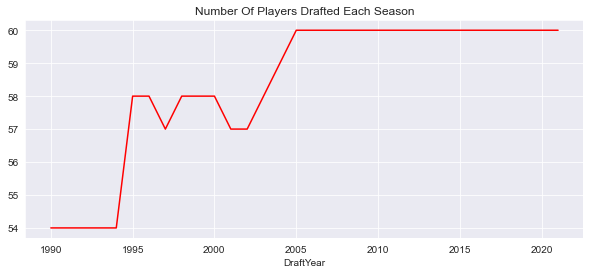

In [107]:
plt.figure(figsize=(10,4))
plt.title('Number Of Players Drafted Each Season')
Year['Player'].count().plot(kind='line', color='red')

<AxesSubplot:title={'center':'Years Spent in the NBA against Draftyear'}, xlabel='DraftYear', ylabel='Years spent in the NBA'>

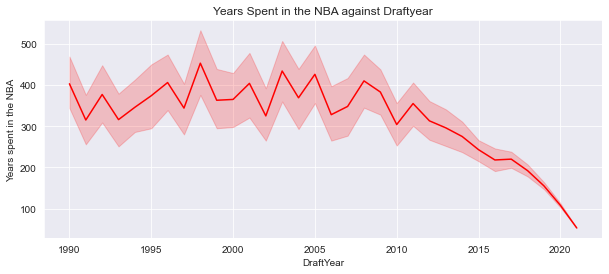

In [102]:
plt.figure(figsize=(10,4))
plt.title('Years Spent in the NBA against Draftyear')
sns.lineplot(x='DraftYear',y='Years spent in the NBA', data=data, estimator='sum',color = 'red')

<AxesSubplot:title={'center':'Years Spent in the NBA against Draftyear'}, xlabel='DraftYear', ylabel='Total Minutes Played'>

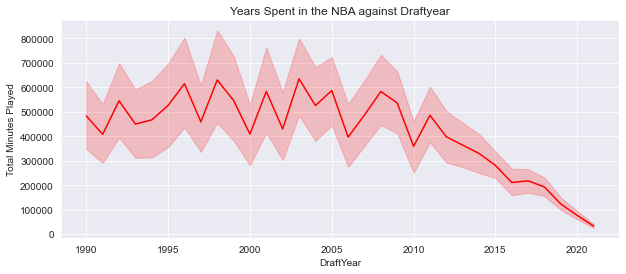

In [104]:
plt.figure(figsize=(10,4))
plt.title('Years Spent in the NBA against Draftyear')
sns.lineplot(x='DraftYear',y='Total Minutes Played', data=data, estimator='sum',legend="brief",color = 'red')

<AxesSubplot:title={'center':'Years Spent in the NBA against Draftyear'}, xlabel='DraftYear', ylabel='Total Points Scored'>

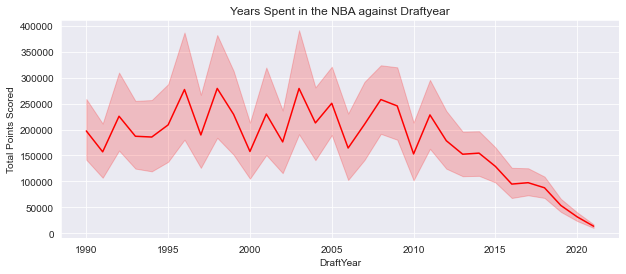

In [103]:
plt.figure(figsize=(10,4))
plt.title('Years Spent in the NBA against Draftyear')
sns.lineplot(x='DraftYear',y='Total Points Scored', data=data, estimator='sum',color = 'red')

In [92]:
data.head(1)

,Rk,Pk,Team,Player,College,Years spent in the NBA,G,Total Minutes Played,Total Points Scored,Total rebounds grabbed,...,Win shares in the NBA per 48 minutes,Box plus-minus,Value over replacement player,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,7232.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990


C:\Users\JOEL\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x288 with 0 Axes>

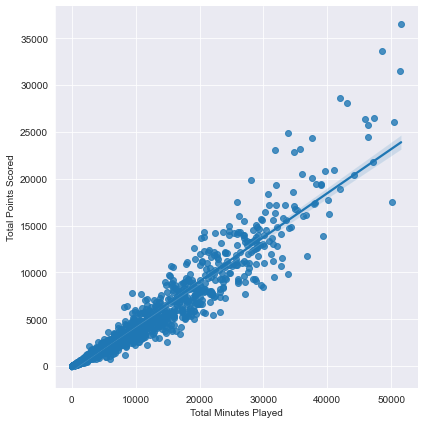

In [122]:
plt.figure(figsize=(10,4))
sns.lmplot(x='Total Minutes Played', y='Total Points Scored', data=data, size=6,markers=["o"])